In [82]:
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 50)
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

## 5years data with many feature

In [105]:
import pandas as pd
df=pd.read_csv('news_cos_stock_sk.csv')
df.columns.values[0]='DATE'
data=df.set_index('DATE')
data.columns
data.head()

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', '5MA', '5Disparity',
       '20MA', '20Disparity', '60MA', '60Disparity', '120MA', '120Disparity',
       'bol_high', 'bol_low', 'PPO', 'PVO', 'SO', 'Williams_R', 'EOM', 'MFI',
       'NVI', 'OBV', 'ATR', 'UI', 'ADX', 'MACD', 'TRIX', 'CCI', 'RMI', 'VHF',
       'Institutional_trading', 'Individual_trading', 'Foreign_trading',
       'Short_volume', 'Short_left', 'Cos_sim', 'wil', 'buy', 'Fluctuation',
       'label', 'C_O', 'H_L', 'H_C', 'C_L'],
      dtype='object')

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,Short_left,Cos_sim,wil,buy,Fluctuation,label,C_O,H_L,H_C,C_L
DATE,,,,,,,,,,,,,,,,,,,,,
2019-03-04,70300,71400,69900,70100,4931703,0.001429,72880.0,0.961855,74760.0,0.937667,...,1856147,0,69050.0,0,0,0.0,-200,1500,1300,200
2019-03-05,68300,70000,68300,69700,3465521,-0.005706,71740.0,0.971564,74450.0,0.936199,...,1659421,0,69050.0,1,0,0.0,1400,1700,300,1400
2019-03-06,68500,69600,67400,68100,4958303,-0.022956,70320.0,0.968430,74160.0,0.918285,...,1337487,1,69350.0,1,0,0.0,-400,2200,1500,700
2019-03-07,67200,68900,67100,68100,3402570,0.000000,69200.0,0.984104,73770.0,0.923139,...,1160003,0,68300.0,1,0,0.0,900,1800,800,1000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558,68540.0,0.973154,73270.0,0.910332,...,1188425,0,68800.0,0,0,0.0,-1200,2000,1500,500


In [106]:
data["Fluctuation"] = 0
data.loc[data["Change"] > 0, "Fluctuation"] = 1
data["Fluctuation"].value_counts()

Fluctuation
0    654
1    581
Name: count, dtype: int64

In [107]:
import pandas as pd
import FinanceDataReader as fdr

# 데이터 가져오기
sp500 = fdr.DataReader('^GSPC', '2019-03-04', '2024-02-29')
nasdaq = fdr.DataReader('^IXIC', '2019-03-04', '2024-02-29')
gold = fdr.DataReader('GC=F', '2019-03-04', '2024-02-29')
oil = fdr.DataReader('CL=F', '2019-03-04', '2024-02-29')
usdkrw = fdr.DataReader('USD/KRW', '2019-03-04', '2024-02-29')

# 데이터프레임 병합
data_eco = pd.concat([sp500['Close'], nasdaq['Close'], gold['Close'], oil['Close'], usdkrw['Close']], axis=1)
data_eco.columns = ['S&P 500', 'NASDAQ', 'Gold', 'Oil', 'USD/KRW']

# 결과 출력
print(data_eco.head())

isnadata=data_eco[data_eco.isnull().any(axis=1)]


                S&P 500       NASDAQ         Gold        Oil      USD/KRW
Date                                                                     
2019-03-04  2792.810059  7577.569824  1284.800049  56.590000  1126.810059
2019-03-05  2789.649902  7576.359863  1282.000000  56.560001  1128.150024
2019-03-06  2771.449951  7505.919922  1284.900024  56.220001  1126.199951
2019-03-07  2748.929932  7421.459961  1283.800049  56.660000  1127.000000
2019-03-08  2743.070068  7408.140137  1297.000000  56.070000  1133.069946


In [108]:
data.index = pd.to_datetime(data.index)
merged_data = pd.merge(data, data_eco, left_index=True, right_index=True)
merged_data.head()


,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,label,C_O,H_L,H_C,C_L,S&P 500,NASDAQ,Gold,Oil,USD/KRW
2019-03-04,70300,71400,69900,70100,4931703,0.001429,72880.0,0.961855,74760.0,0.937667,...,0.0,-200,1500,1300,200,2792.810059,7577.569824,1284.800049,56.590000,1126.810059
2019-03-05,68300,70000,68300,69700,3465521,-0.005706,71740.0,0.971564,74450.0,0.936199,...,0.0,1400,1700,300,1400,2789.649902,7576.359863,1282.000000,56.560001,1128.150024
2019-03-06,68500,69600,67400,68100,4958303,-0.022956,70320.0,0.968430,74160.0,0.918285,...,0.0,-400,2200,1500,700,2771.449951,7505.919922,1284.900024,56.220001,1126.199951
2019-03-07,67200,68900,67100,68100,3402570,0.000000,69200.0,0.984104,73770.0,0.923139,...,0.0,900,1800,800,1000,2748.929932,7421.459961,1283.800049,56.660000,1127.000000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558,68540.0,0.973154,73270.0,0.910332,...,0.0,-1200,2000,1500,500,2743.070068,7408.140137,1297.000000,56.070000,1133.069946


In [109]:
merged_data.isna().sum()
# 결측치를 'bfill'로 처리하기
data_df_filled = merged_data.fillna(method='bfill')
data_df_filled.isnull().sum()
data=data_df_filled.copy()

Open        0
High        0
Low         0
Close       0
Volume      0
           ..
S&P 500    39
NASDAQ     39
Gold       38
Oil        38
USD/KRW     1
Length: 51, dtype: int64

Open       0
High       0
Low        0
Close      0
Volume     0
          ..
S&P 500    0
NASDAQ     0
Gold       0
Oil        0
USD/KRW    0
Length: 51, dtype: int64

## 변수 선택


In [110]:
data.head()

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,label,C_O,H_L,H_C,C_L,S&P 500,NASDAQ,Gold,Oil,USD/KRW
2019-03-04,70300,71400,69900,70100,4931703,0.001429,72880.0,0.961855,74760.0,0.937667,...,0.0,-200,1500,1300,200,2792.810059,7577.569824,1284.800049,56.590000,1126.810059
2019-03-05,68300,70000,68300,69700,3465521,-0.005706,71740.0,0.971564,74450.0,0.936199,...,0.0,1400,1700,300,1400,2789.649902,7576.359863,1282.000000,56.560001,1128.150024
2019-03-06,68500,69600,67400,68100,4958303,-0.022956,70320.0,0.968430,74160.0,0.918285,...,0.0,-400,2200,1500,700,2771.449951,7505.919922,1284.900024,56.220001,1126.199951
2019-03-07,67200,68900,67100,68100,3402570,0.000000,69200.0,0.984104,73770.0,0.923139,...,0.0,900,1800,800,1000,2748.929932,7421.459961,1283.800049,56.660000,1127.000000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558,68540.0,0.973154,73270.0,0.910332,...,0.0,-1200,2000,1500,500,2743.070068,7408.140137,1297.000000,56.070000,1133.069946


In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

correlation_df = data

# 상관관계 행렬 계산
correlation_matrix = correlation_df.corr()
co_df=correlation_matrix[abs(correlation_matrix['Fluctuation'])>0.3][['Fluctuation']]

In [18]:
co_df.sort_values(by='Fluctuation', key=lambda x: abs(x), ascending=False)

,Fluctuation
Fluctuation,1.000000
Change,0.755341
Individual_trading,-0.591498
C_O,0.556812
5Disparity,0.556270
EOM,0.502950
Foreign_trading,0.470864
C_L,0.464923
buy,0.422940
SO,0.411648


In [19]:
# 다중공선성 확인 
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

stock_data = data

X = stock_data.drop(columns=['Fluctuation'])  
y = stock_data['Fluctuation']

def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

vif = calculate_vif(X)
print(vif)

# 다중공선성이 높은 변수를 제거. VIF가 10 이상인 변수는 다중공선성이 있는 것으로 판단
high_vif_variables = vif[vif['VIF'] > 10]['feature']
X_filtered = X.drop(columns=high_vif_variables)

vif_filtered = calculate_vif(X_filtered)
print(vif_filtered)
vif_filtered['feature']

C:\Anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                  feature           VIF
0                    Open           inf
1                    High           inf
2                     Low           inf
3                   Close           inf
4                  Volume  3.426427e+00
5                  Change  8.219011e+00
6                     5MA  7.991741e+03
7              5Disparity  9.884346e+01
8                    20MA           inf
9             20Disparity  1.748138e+02
10                   60MA  4.115100e+03
11            60Disparity  7.546547e+02
12                  120MA  4.746741e+02
13           120Disparity  2.223457e+02
14               bol_high           inf
15                bol_low           inf
16                    PPO  1.130640e+03
17                    PVO  2.701351e+00
18                     SO  2.467813e+04
19             Williams_R  2.282126e+04
20                    EOM  3.197742e+00
21                    MFI  3.850879e+00
22                    NVI  2.589774e+00
23                    OBV  2.956321e+01


0           Volume
1           Change
2              PVO
3              EOM
4              MFI
5              NVI
6              ADX
7              CCI
8              RMI
9              VHF
10    Short_volume
11      Short_left
12         Cos_sim
13             buy
14           label
15            Gold
16             Oil
17         USD/KRW
Name: feature, dtype: object

In [24]:
vif[vif['VIF'] < 10].sort_values('VIF',ascending=False)

,feature,VIF
29,CCI,9.258234
49,USD/KRW,8.225445
5,Change,8.219011
30,RMI,7.711355
48,Oil,5.461604
36,Short_left,4.891446
47,Gold,4.136401
21,MFI,3.850879
26,ADX,3.804722
4,Volume,3.426427


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
df=data.copy()

X = df.drop(columns=['Fluctuation'])  
y = df['Fluctuation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
# 상위 중요도를 가진 feature 선택
top_features = feature_importance_df.head(10)
top_features


RandomForestClassifier(random_state=42)

,Feature,Importance
5,Change,0.400434
33,Individual_trading,0.144462
7,5Disparity,0.056587
41,C_O,0.055626
20,EOM,0.046843
34,Foreign_trading,0.043129
44,C_L,0.034077
39,buy,0.018284
32,Institutional_trading,0.017279
43,H_C,0.015265


In [136]:
top_features['Importance'].values

array([0.40043377, 0.14446245, 0.05658738, 0.05562617, 0.04684287,
       0.04312918, 0.03407699, 0.01828432, 0.01727879, 0.01526546,
       0.01474567, 0.01459178, 0.01357798, 0.00660676, 0.00630647,
       0.00568865, 0.00508391, 0.00444453, 0.00435228, 0.00399817])

### 특성별 변수 

In [202]:
data=data_df_filled.copy()
data.head()

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,label,C_O,H_L,H_C,C_L,S&P 500,NASDAQ,Gold,Oil,USD/KRW
2019-03-04,70300,71400,69900,70100,4931703,0.001429,72880.0,0.961855,74760.0,0.937667,...,0.0,-200,1500,1300,200,2792.810059,7577.569824,1284.800049,56.590000,1126.810059
2019-03-05,68300,70000,68300,69700,3465521,-0.005706,71740.0,0.971564,74450.0,0.936199,...,0.0,1400,1700,300,1400,2789.649902,7576.359863,1282.000000,56.560001,1128.150024
2019-03-06,68500,69600,67400,68100,4958303,-0.022956,70320.0,0.968430,74160.0,0.918285,...,0.0,-400,2200,1500,700,2771.449951,7505.919922,1284.900024,56.220001,1126.199951
2019-03-07,67200,68900,67100,68100,3402570,0.000000,69200.0,0.984104,73770.0,0.923139,...,0.0,900,1800,800,1000,2748.929932,7421.459961,1283.800049,56.660000,1127.000000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558,68540.0,0.973154,73270.0,0.910332,...,0.0,-1200,2000,1500,500,2743.070068,7408.140137,1297.000000,56.070000,1133.069946


In [74]:
a=correlation_matrix[abs(correlation_matrix['Fluctuation'])>0.3][['Fluctuation']].index.to_list()
b=vif[vif['VIF']<10]['feature'].tolist()
lis=list(set(a+b))

In [75]:
lis

['RMI',
 'SO',
 'Gold',
 'ADX',
 'Foreign_trading',
 'Oil',
 'Volume',
 'MFI',
 'USD/KRW',
 'Williams_R',
 'Institutional_trading',
 'label',
 'C_L',
 'VHF',
 'EOM',
 'PVO',
 'Individual_trading',
 'NVI',
 'H_C',
 'Change',
 'buy',
 'Short_left',
 'Fluctuation',
 '20Disparity',
 '5Disparity',
 'CCI',
 'Cos_sim',
 'Short_volume',
 'C_O']

In [111]:
# 이동평균이상도 관련 지표 
moving_average_disparity_related_indicators = ['5Disparity','20Disparity']

# 주식 거래자 유형 관련 지표 
trader_type_related_indicators = ['Institutional_trading', 'Individual_trading', 'Foreign_trading']

# 외부 재무지표
eco_indicators=['Gold','Oil','USD/KRW']

# 가격 관련 
trade_indicators=['C_O','H_C','C_L','Short_left', 'Short_volume']

# 추세 추종 지표
trend_indicators = ['ADX', 'CCI','VHF']

# 오실레이터 지표 
oscillator_indicators = ['RMI', 'SO', 'Williams_R']

# 거래량 관련 지표
volume_indicators = ['MFI', 'EOM', 'PVO', 'NVI']

# 기사 감성분석 
news_indicators=['label']

# 코사인 유사도 
cos_indicators=['Cos_sim']

In [122]:
 combined_data          0.540164
1  combined_data2          0.513525
2  combined_data3          0.531148
3  combined_data4          0.522541
4  combined_data5          0.477459
5  combined_data6          0.590164
6  combined_data7          0.506967
7  combined_data8          0.554918
8  combined_data9          0.534836

SyntaxError: invalid syntax (3905975588.py, line 1)

In [112]:
new_data=data[['Open', 'High', 'Low', 'Close', 'Change','Fluctuation','Volume']]


In [113]:
import pandas as pd
import pandas as pd
combined_data = pd.concat([data[moving_average_disparity_related_indicators], new_data], axis=1) #0.54
combined_data2 = pd.concat([data[trader_type_related_indicators], new_data], axis=1) #515
combined_data3 = pd.concat([data[eco_indicators], new_data], axis=1)# 53
combined_data4 = pd.concat([data[trade_indicators], new_data], axis=1) # 534

combined_data5 = pd.concat([data[trend_indicators], new_data], axis=1) # 49
combined_data6=pd.concat([data[oscillator_indicators], new_data], axis=1) # 5
combined_data7=pd.concat([data[volume_indicators], new_data], axis=1) # 52
combined_data8=pd.concat([data[news_indicators], new_data], axis=1)# 554
combined_data9=pd.concat([data[cos_indicators], new_data], axis=1)  # 534

In [302]:
data=data_df_filled.copy()
data.head()

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,label,C_O,H_L,H_C,C_L,S&P 500,NASDAQ,Gold,Oil,USD/KRW
2019-03-04,70300,71400,69900,70100,4931703,0.001429,72880.0,0.961855,74760.0,0.937667,...,0.0,-200,1500,1300,200,2792.810059,7577.569824,1284.800049,56.590000,1126.810059
2019-03-05,68300,70000,68300,69700,3465521,-0.005706,71740.0,0.971564,74450.0,0.936199,...,0.0,1400,1700,300,1400,2789.649902,7576.359863,1282.000000,56.560001,1128.150024
2019-03-06,68500,69600,67400,68100,4958303,-0.022956,70320.0,0.968430,74160.0,0.918285,...,0.0,-400,2200,1500,700,2771.449951,7505.919922,1284.900024,56.220001,1126.199951
2019-03-07,67200,68900,67100,68100,3402570,0.000000,69200.0,0.984104,73770.0,0.923139,...,0.0,900,1800,800,1000,2748.929932,7421.459961,1283.800049,56.660000,1127.000000
2019-03-08,67900,68200,66200,66700,3571792,-0.020558,68540.0,0.973154,73270.0,0.910332,...,0.0,-1200,2000,1500,500,2743.070068,7408.140137,1297.000000,56.070000,1133.069946


In [92]:
c=moving_average_disparity_related_indicators+news_indicators+trade_indicators+cos_indicators #0.5368
# c=moving_average_disparity_related_indicators+news_indicators+cos_indicators+  eco_indicators+ trade_indicators

data=pd.concat([new_data,data[c]],axis=1)

In [93]:
data.columns
# combined_data2,combined_data5,combined_data6,combined_data7

Index(['Open', 'High', 'Low', 'Close', 'Change', 'Fluctuation', 'Volume',
       '5Disparity', '20Disparity', 'label', 'C_O', 'H_C', 'C_L', 'Short_left',
       'Short_volume', 'Cos_sim'],
      dtype='object')

## 모델링 
- 5년치 데이터 최적의 파라미터 찾기

In [114]:
TARGET = "Fluctuation"
SEQ_SIZE = 30        # 30 / 60 / 120
PRED_SIZE = 1


In [98]:
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column

        if y_end_number > len(dataset):
            break
        tmp_x = dataset.iloc[i:x_end_number, :]  # Adjusted for Pandas
        tmp_y = dataset.iloc[x_end_number:y_end_number, :].loc[:, TARGET]
        x.append(tmp_x.values)  # Convert to numpy array
        y.append(tmp_y.values)  # Convert to numpy array

    return np.array(x), np.array(y)

X, y = split_xy(data, SEQ_SIZE, PRED_SIZE)
print(X[0],"\n", y[0])
print("X size : ", X.shape)
print("y size : ", y.shape)

[[ 7.03000000e+04  7.14000000e+04  6.99000000e+04  7.01000000e+04
   1.42857143e-03  1.00000000e+00  4.93170300e+06  9.61855104e-01
   9.37667202e-01  0.00000000e+00 -2.00000000e+02  1.30000000e+03
   2.00000000e+02  1.85614700e+06  3.86605000e+05  0.00000000e+00]
 [ 6.83000000e+04  7.00000000e+04  6.83000000e+04  6.97000000e+04
  -5.70613409e-03  0.00000000e+00  3.46552100e+06  9.71563981e-01
   9.36198791e-01  0.00000000e+00  1.40000000e+03  3.00000000e+02
   1.40000000e+03  1.65942100e+06  2.66833000e+05  0.00000000e+00]
 [ 6.85000000e+04  6.96000000e+04  6.74000000e+04  6.81000000e+04
  -2.29555237e-02  0.00000000e+00  4.95830300e+06  9.68430034e-01
   9.18284790e-01  0.00000000e+00 -4.00000000e+02  1.50000000e+03
   7.00000000e+02  1.33748700e+06  6.53245000e+05  1.00000000e+00]
 [ 6.72000000e+04  6.89000000e+04  6.71000000e+04  6.81000000e+04
   0.00000000e+00  0.00000000e+00  3.40257000e+06  9.84104046e-01
   9.23139488e-01  0.00000000e+00  9.00000000e+02  8.00000000e+02
   1.00

In [96]:
## 표준졍규화-> 시퀀스가 작을 때 표준편차가 0이 되는 경우가 있어서 이를 확인하고 선택해야 함 
import numpy as np
# 시퀀스별로 정규화
def scale_sequences(data):
    scaled_data = []
    for sample in data:
        # 시퀀스별로 평균과 표준 편차 계산
        mean = np.mean(sample, axis=0)
        std = np.std(sample, axis=0)
        if 0 in std:
            print('error')
        # 표준화 수행
        scaled_sample = (sample - mean) / std
        scaled_data.append(scaled_sample)
    return np.array(scaled_data)

# 주식 데이터를 시퀀스별로 표준화
X = scale_sequences(X)


In [116]:
# 시퀀스별로 Min-Max 정규화
def min_max_scale_sequences(data):
    scaled_data = np.zeros_like(data) 
    for i in range(data.shape[0]):
        for j in range(data.shape[2]):
            min_val = np.min(data[i, :, j])
            max_val = np.max(data[i, :, j])
            if min_val == max_val:
                scaled_data[i, :, j] = 0
            else:
                scaled_data[i, :, j] = (data[i, :, j] - min_val) / (max_val - min_val)
    return scaled_data

# 주식 데이터를 시퀀스별로 Min-Max 정규화
X_normalized = min_max_scale_sequences(X)

# 결과 확인
print(X_normalized.shape)


(1204, 30, 16)


In [100]:
from sklearn.model_selection import train_test_split

# 3차원 배열 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)


In [221]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras import regularizers
import numpy as np

# 초기화 함수 선택
initializer = GlorotNormal()

# 정확도를 저장할 리스트
accuracies = []

# 10번의 반복 훈련
for _ in range(10):
    # 모델 구성
    model = Sequential([
        GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.003)),
        Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.003)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2, callbacks=[early_stopping], verbose=0)

    # 테스트 데이터로 평가
    _, accuracy = model.evaluate(X_test, y_test, verbose=0)
    accuracies.append(accuracy)

# 정확도 평균 계산
mean_accuracy = np.mean(accuracies)
print(f'평균 정확도: {mean_accuracy}')


Epoch 75: early stopping
Restoring model weights from the end of the best epoch: 65.
Epoch 57: early stopping
Restoring model weights from the end of the best epoch: 47.
Epoch 68: early stopping
Restoring model weights from the end of the best epoch: 58.
Epoch 70: early stopping
Restoring model weights from the end of the best epoch: 60.
Epoch 62: early stopping
Restoring model weights from the end of the best epoch: 52.
Epoch 68: early stopping
Restoring model weights from the end of the best epoch: 58.
Epoch 65: early stopping
Restoring model weights from the end of the best epoch: 55.
Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 57.
Epoch 62: early stopping
Restoring model weights from the end of the best epoch: 52.
Epoch 67: early stopping
Restoring model weights from the end of the best epoch: 57.
평균 정확도: 0.5188524603843689


### 5년치 최적 변수의 조합

In [101]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras import regularizers
from sklearn.metrics import precision_score

# 초기화 함수 선택
initializer = GlorotNormal()

# 모델 구성
model = Sequential([
    GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.003)),
    Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.003)),
    Dense(16, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.003)),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

# 평가
loss, accuracy = model.evaluate(X_test, y_test)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 정밀도 계산
precision = precision_score(y_test, y_pred_binary)

print(f'테스트 손실: {loss}')
print(f'테스트 정확도: {accuracy}')
print(f'테스트 정밀도: {precision}')


C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.4549 - loss: 1.0005 - val_accuracy: 0.5492 - val_loss: 0.9793
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5333 - loss: 0.9741 - val_accuracy: 0.5337 - val_loss: 0.9587
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.5346 - loss: 0.9530 - val_accuracy: 0.5285 - val_loss: 0.9415
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5300 - loss: 0.9371 - val_accuracy: 0.5181 - val_loss: 0.9253
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5329 - loss: 0.9197 - val_accuracy: 0.5181 - val_loss: 0.9101
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5520 - loss: 0.9032 - val_accuracy: 0.5233 - val_loss: 0.8959
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5317 - loss: 0.8908 - val_accuracy: 0.5181 - val_loss: 0.8831
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5367 - loss: 0.8780 - val_accuracy: 0.5181

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6119 - loss: 0.6824
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
테스트 손실: 0.6914379000663757
테스트 정확도: 0.5767635107040405
테스트 정밀도: 0.5454545454545454


## data 20년치로 늘려 딥러닝 성능 향상 확인
- 장점: 데이터셋 증가로 인한 딥러닝 성능 증가
- 단점: 중요한 변수의 손실

### 데이터 불러오기 20년치

In [61]:
data=pd.read_csv('cos_sk_data.csv')

data.index = data["Date"]
data.drop("Date", axis = 1, inplace = True)
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Change', '5MA', '5Disparity',
       '20MA', '20Disparity', '60MA', '60Disparity', '120MA', '120Disparity',
       'bol_high', 'bol_low', 'PPO', 'PVO', 'SO', 'Williams_R', 'EOM', 'MFI',
       'NVI', 'OBV', 'ATR', 'UI', 'ADX', 'MACD', 'TRIX', 'CCI', 'RMI', 'VHF',
       'C_O', 'H_L', 'H_C', 'C_L', 'Cos_sim'],
      dtype='object')

In [72]:
data

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,C_L,Cos_sim,Fluctuation,wil,buy,S&P 500,NASDAQ,Gold,Oil,USD/KRW
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,5740,5750,5570,5600,4148379,0.000000,5338,1.049082,6049.5,0.925696,...,30,0,0,5700.0,0,1108.479980,2006.680054,424.399994,33.779999,1195.800049
2004-01-05,5610,6360,5560,6250,18766562,0.116071,5548,1.126532,6024.5,1.037430,...,690,0,1,5700.0,1,1122.219971,2047.359985,424.399994,33.779999,1178.900024
2004-01-06,6380,6470,6070,6130,10501167,-0.019200,5766,1.063129,5998.0,1.022007,...,60,0,0,6780.0,0,1123.670044,2057.370117,422.799988,33.700001,1189.400024
2004-01-07,6280,6850,6230,6620,20562472,0.079935,6040,1.096026,6006.5,1.102139,...,390,0,1,6480.0,1,1126.329956,2077.679932,421.899994,33.619999,1176.800049
2004-01-08,6800,6970,6500,6510,13864093,-0.016616,6222,1.046287,6017.5,1.081845,...,10,0,0,7110.0,0,1131.920044,2100.250000,424.000000,33.980000,1171.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-22,154500,156500,152600,156500,5966352,0.050336,150640,1.038901,142040.0,1.101802,...,3900,0,1,157050.0,0,5087.029785,16041.620117,2019.699951,78.610001,1332.869995
2024-02-23,166900,166900,159800,161400,7012032,0.031310,153560,1.051055,143035.0,1.128395,...,1600,0,1,168850.0,0,5088.799805,15996.820313,2038.599976,76.489998,1327.170044
2024-02-26,158400,164800,158400,161800,4329477,0.002478,155660,1.039445,144255.0,1.121625,...,3400,0,1,161950.0,1,5069.529785,15976.250000,2028.500000,77.580002,1330.000000


In [63]:
data["Fluctuation"] = 0
data.loc[data["Change"] > 0, "Fluctuation"] = 1
data["Fluctuation"].value_counts()

Fluctuation
0    2575
1    2450
Name: count, dtype: int64

In [64]:
# wil 지표 산출
for i in range(1, len(data)):
    data.loc[data.index[i], 'wil'] = data.iloc[i]['Open'] + (data.iloc[i-1]['High'] - data.iloc[i-1]['Low']) *0.5

# 고가가 wil 보다 높을 때 1 아닐 때  0 분류 
data['buy'] = (data['wil'] < data['High']).astype(int)

In [65]:
import pandas as pd
import FinanceDataReader as fdr

# 데이터 가져오기
sp500 = fdr.DataReader('^GSPC', '2004-01-02', '2024-02-29')
nasdaq = fdr.DataReader('^IXIC', '2004-01-02', '2024-02-29')
gold = fdr.DataReader('GC=F', '2004-01-02', '2024-02-29')
oil = fdr.DataReader('CL=F', '2004-01-02', '2024-02-29')
usdkrw = fdr.DataReader('USD/KRW', '2004-01-02', '2024-02-29')

# 데이터프레임 병합
data_eco = pd.concat([sp500['Close'], nasdaq['Close'], gold['Close'], oil['Close'], usdkrw['Close']], axis=1)

# 중복된 인덱스 제거
data_eco = data_eco.loc[~data_eco.index.duplicated()]

print(data_eco)

data_eco.columns = ['S&P 500', 'NASDAQ', 'Gold', 'Oil', 'USD/KRW']

isnadata=data_eco[data_eco.isnull().any(axis=1)]
data.index = pd.to_datetime(data.index)
merged_data = pd.merge(data, data_eco, left_index=True, right_index=True)
merged_data.head()
merged_data.isna().sum()
# 결측치를 'bfill'로 처리하기
data_df_filled = merged_data.fillna(method='bfill')
data_df_filled.isnull().sum()
data_df_filled.head()
data=data_df_filled.copy()
len(data.columns)

                  Close         Close        Close      Close        Close
Date                                                                      
2004-01-02  1108.479980   2006.680054          NaN        NaN  1195.800049
2004-01-05  1122.219971   2047.359985   424.399994  33.779999  1178.900024
2004-01-06  1123.670044   2057.370117   422.799988  33.700001  1189.400024
2004-01-07  1126.329956   2077.679932   421.899994  33.619999  1176.800049
2004-01-08  1131.920044   2100.250000   424.000000  33.980000  1171.000000
...                 ...           ...          ...        ...          ...
2024-02-22  5087.029785  16041.620117  2019.699951  78.610001  1332.869995
2024-02-23  5088.799805  15996.820313  2038.599976  76.489998  1327.170044
2024-02-26  5069.529785  15976.250000  2028.500000  77.580002  1330.000000
2024-02-27  5078.180176  16035.299805  2034.000000  78.870003  1331.719971
2024-02-28  5069.759766  15947.740234  2033.000000  78.540001  1331.790039

[5259 rows x 5 columns]


,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,C_L,Cos_sim,Fluctuation,wil,buy,S&P 500,NASDAQ,Gold,Oil,USD/KRW
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,5740,5750,5570,5600,4148379,0.000000,5338,1.049082,6049.5,0.925696,...,30,0,0,NaN,0,1108.479980,2006.680054,NaN,NaN,1195.800049
2004-01-05,5610,6360,5560,6250,18766562,0.116071,5548,1.126532,6024.5,1.037430,...,690,0,1,5700.0,1,1122.219971,2047.359985,424.399994,33.779999,1178.900024
2004-01-06,6380,6470,6070,6130,10501167,-0.019200,5766,1.063129,5998.0,1.022007,...,60,0,0,6780.0,0,1123.670044,2057.370117,422.799988,33.700001,1189.400024
2004-01-07,6280,6850,6230,6620,20562472,0.079935,6040,1.096026,6006.5,1.102139,...,390,0,1,6480.0,1,1126.329956,2077.679932,421.899994,33.619999,1176.800049
2004-01-08,6800,6970,6500,6510,13864093,-0.016616,6222,1.046287,6017.5,1.081845,...,10,0,0,7110.0,0,1131.920044,2100.250000,424.000000,33.980000,1171.000000


Open              0
High              0
Low               0
Close             0
Volume            0
Change            0
5MA               0
5Disparity        0
20MA              0
20Disparity       0
60MA              0
60Disparity       0
120MA             0
120Disparity      0
bol_high          0
bol_low           0
PPO               0
PVO               0
SO                0
Williams_R        0
EOM               0
MFI               0
NVI               0
OBV               0
ATR               0
UI                0
ADX               0
MACD              0
TRIX              0
CCI               0
RMI               0
VHF               0
C_O               0
H_L               0
H_C               0
C_L               0
Cos_sim           0
Fluctuation       0
wil               1
buy               0
S&P 500         155
NASDAQ          155
Gold            163
Oil             159
USD/KRW          29
dtype: int64

Open            0
High            0
Low             0
Close           0
Volume          0
Change          0
5MA             0
5Disparity      0
20MA            0
20Disparity     0
60MA            0
60Disparity     0
120MA           0
120Disparity    0
bol_high        0
bol_low         0
PPO             0
PVO             0
SO              0
Williams_R      0
EOM             0
MFI             0
NVI             0
OBV             0
ATR             0
UI              0
ADX             0
MACD            0
TRIX            0
CCI             0
RMI             0
VHF             0
C_O             0
H_L             0
H_C             0
C_L             0
Cos_sim         0
Fluctuation     0
wil             0
buy             0
S&P 500         0
NASDAQ          0
Gold            0
Oil             0
USD/KRW         0
dtype: int64

,Open,High,Low,Close,Volume,Change,5MA,5Disparity,20MA,20Disparity,...,C_L,Cos_sim,Fluctuation,wil,buy,S&P 500,NASDAQ,Gold,Oil,USD/KRW
Date,,,,,,,,,,,,,,,,,,,,,
2004-01-02,5740,5750,5570,5600,4148379,0.000000,5338,1.049082,6049.5,0.925696,...,30,0,0,5700.0,0,1108.479980,2006.680054,424.399994,33.779999,1195.800049
2004-01-05,5610,6360,5560,6250,18766562,0.116071,5548,1.126532,6024.5,1.037430,...,690,0,1,5700.0,1,1122.219971,2047.359985,424.399994,33.779999,1178.900024
2004-01-06,6380,6470,6070,6130,10501167,-0.019200,5766,1.063129,5998.0,1.022007,...,60,0,0,6780.0,0,1123.670044,2057.370117,422.799988,33.700001,1189.400024
2004-01-07,6280,6850,6230,6620,20562472,0.079935,6040,1.096026,6006.5,1.102139,...,390,0,1,6480.0,1,1126.329956,2077.679932,421.899994,33.619999,1176.800049
2004-01-08,6800,6970,6500,6510,13864093,-0.016616,6222,1.046287,6017.5,1.081845,...,10,0,0,7110.0,0,1131.920044,2100.250000,424.000000,33.980000,1171.000000


45

In [73]:
TARGET = "Fluctuation"
SEQ_SIZE = 30        # 30 / 60 / 120
PRED_SIZE = 1
BATCH_SIZE = 1                        # 1 / 4 / 8
HIDDEN_SIZE = 32                      # 64 / 128
EPOCHS = 1000

In [74]:
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column

        if y_end_number > len(dataset):
            break
        tmp_x = dataset.iloc[i:x_end_number, :]  
        tmp_y = dataset.iloc[x_end_number:y_end_number, :].loc[:, TARGET]
        x.append(tmp_x.values)  
        y.append(tmp_y.values)  

    return np.array(x), np.array(y)

X, y = split_xy(data, SEQ_SIZE, PRED_SIZE)
print(X[0],"\n", y[0])
print("X size : ", X.shape)
print("y size : ", y.shape)

[[5740.       5750.       5570.       ...  424.399994   33.779999
  1195.800049]
 [5610.       6360.       5560.       ...  424.399994   33.779999
  1178.900024]
 [6380.       6470.       6070.       ...  422.799988   33.700001
  1189.400024]
 ...
 [8260.       8530.       8250.       ...  410.299988   34.560001
  1159.699951]
 [8360.       8600.       8240.       ...  416.         35.16
  1147.699951]
 [8470.       8850.       8460.       ...  416.         35.16
  1156.900024]] 
 [1]
X size :  (4955, 30, 45)
y size :  (4955, 1)


In [137]:
## 표준졍규화-> 시퀀스가 작을 때 표준편차가 0이 되는 경우가 있어서 이를 확인하고 선택해야 함 
import numpy as np
# 시퀀스별로 정규화
def scale_sequences(data):
    scaled_data = []
    for sample in data:
        # 시퀀스별로 평균과 표준 편차 계산
        mean = np.mean(sample, axis=0)
        std = np.std(sample, axis=0)
        if 0 in std:
            print('error')
        # 표준화 수행
        scaled_sample = (sample - mean) / std
        scaled_data.append(scaled_sample)
    return np.array(scaled_data)

# 주식 데이터를 시퀀스별로 표준화
X = scale_sequences(X)


error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error
error


C:\Users\minye\AppData\Local\Temp\ipykernel_15844\496664998.py:13: RuntimeWarning: invalid value encountered in divide
  scaled_sample = (sample - mean) / std


error
error
error
error
error
error
error
error
error


In [75]:
# 시퀀스별로 Min-Max 정규화
for i in range(X.shape[0]):  
    for j in range(X.shape[2]): 
        # 시퀀스 내에서 각 피쳐의 최소값과 최대값 계산
        min_val = np.min(X[i, :, j])
        max_val = np.max(X[i, :, j])
        if min_val == max_val:
            X[i, :, j] = 0  
        else:
            X[i, :, j] = (X[i, :, j] - min_val) / (max_val - min_val)

# 결과 확인
print(X.shape)

(4955, 30, 45)


In [76]:
from sklearn.model_selection import train_test_split

# 3차원 배열 데이터를 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)


### 시퀀스별 성능

In [104]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

### SEQUENCE 별 성능
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column

        if y_end_number > len(dataset):
            break
        tmp_x = dataset.iloc[i:x_end_number, :]
        tmp_y = dataset.iloc[x_end_number:y_end_number, :].loc[:, TARGET]
        x.append(tmp_x.values)
        y.append(tmp_y.values)

    return np.array(x), np.array(y)

# 함수 정의: 모델 생성 및 훈련
def train_model(X_train, y_train):
    # 조기 종료 설정
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

    # 모델 구성
    model = Sequential([
        GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])

    optimizer = Adam(learning_rate=0.0001)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

    # 모델 훈련
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])

    return model

def evaluate_model(model, X_test, y_test):
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'테스트 손실: {loss}')
    print(f'테스트 정확도: {accuracy}')

# 시간 간격 및 스케일링 방법 설정
time_steps_list = [5,10,15, 30, 60,90]
scaling_methods = ['standard', 'minmax']
y_column = 1  # 하루 예측
results = []

for time_steps in time_steps_list:
    for scaling_method in scaling_methods:
        print(f"현재 시간 간격: {time_steps}일, 스케일링 방법: {scaling_method}")
        X, y = split_xy(data, time_steps, y_column)
        X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)
        
        if scaling_method == 'standard':
            scaler = StandardScaler()
        elif scaling_method == 'minmax':
            scaler = MinMaxScaler()

        X_train_scaled = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
        X_test_scaled = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)

        model = train_model(X_train_scaled, y_train)
        loss, accuracy = model.evaluate(X_test_scaled, y_test)
        results.append({'시간 간격': time_steps, '스케일링 방법': scaling_method, '정확도': accuracy})
        print("----------------------------")

# 결과를 데이터프레임으로 변환
results_df = pd.DataFrame(results)
print(results_df)

현재 시간 간격: 5일, 스케일링 방법: standard


C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5110 - loss: 0.6937 - val_accuracy: 0.4670 - val_loss: 0.6985
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5469 - loss: 0.6906 - val_accuracy: 0.4772 - val_loss: 0.6989
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5546 - loss: 0.6883 - val_accuracy: 0.4924 - val_loss: 0.6995
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6255 - loss: 0.6812 - val_accuracy: 0.4822 - val_loss: 0.7003
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5933 - loss: 0.6825 - val_accuracy: 0.4721 - val_loss: 0.7009
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5863 - loss: 0.6817 - val_accuracy: 0.4772 - val_loss: 0.7019
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6077 - loss: 0.6777 - val_accuracy: 0.4721 - val_loss: 0.7025
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6188 - loss: 0.6755 - val_accuracy: 0.4670 - v

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


99/99 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4365 - loss: 0.6961 - val_accuracy: 0.4822 - val_loss: 0.6928
Epoch 2/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5459 - loss: 0.6920 - val_accuracy: 0.4975 - val_loss: 0.6933
Epoch 3/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5098 - loss: 0.6921 - val_accuracy: 0.4873 - val_loss: 0.6938
Epoch 4/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5391 - loss: 0.6901 - val_accuracy: 0.4873 - val_loss: 0.6941
Epoch 5/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5546 - loss: 0.6892 - val_accuracy: 0.4873 - val_loss: 0.6944
Epoch 6/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5067 - loss: 0.6919 - val_accuracy: 0.4873 - val_loss: 0.6947
Epoch 7/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5046 - loss: 0.6924 - val_accuracy: 0.4822 - val_loss: 0.6952
Epoch 8/100
99/99 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5200 - loss: 0.6909 - val_accuracy: 0.4822 - val_loss: 0.6

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4874 - loss: 0.6926 - val_accuracy: 0.5102 - val_loss: 0.6907
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5375 - loss: 0.6899 - val_accuracy: 0.5306 - val_loss: 0.6898
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5368 - loss: 0.6899 - val_accuracy: 0.5408 - val_loss: 0.6891
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5528 - loss: 0.6879 - val_accuracy: 0.5306 - val_loss: 0.6884
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5282 - loss: 0.6890 - val_accuracy: 0.5255 - val_loss: 0.6878
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5668 - loss: 0.6821 - val_accuracy: 0.5204 - val_loss: 0.6870
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5692 - loss: 0.6835 - val_accuracy: 0.5357 - val_loss: 0.6864
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6055 - loss: 0.6790 - val_accuracy: 0.5561 - val_loss: 0.6

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.4884 - loss: 0.6937 - val_accuracy: 0.5612 - val_loss: 0.6871
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5473 - loss: 0.6869 - val_accuracy: 0.5255 - val_loss: 0.6890
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.4779 - loss: 0.6925 - val_accuracy: 0.5153 - val_loss: 0.6882
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5552 - loss: 0.6902 - val_accuracy: 0.5051 - val_loss: 0.6878
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5097 - loss: 0.6911 - val_accuracy: 0.5102 - val_loss: 0.6896
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4998 - loss: 0.6915 - val_accuracy: 0.5153 - val_loss: 0.6887
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5238 - loss: 0.6889 - val_accuracy: 0.5051 - val_loss: 0.6894
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5308 - loss: 0.6906 - val_accuracy: 0.4949 - val_loss: 0.

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.5208 - loss: 0.6927 - val_accuracy: 0.5436 - val_loss: 0.6836
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5308 - loss: 0.6878 - val_accuracy: 0.5487 - val_loss: 0.6832
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 34ms/step - accuracy: 0.5910 - loss: 0.6818 - val_accuracy: 0.5436 - val_loss: 0.6830
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.5776 - loss: 0.6833 - val_accuracy: 0.5333 - val_loss: 0.6835
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5936 - loss: 0.6778 - val_accuracy: 0.5436 - val_loss: 0.6831
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5901 - loss: 0.6760 - val_accuracy: 0.5333 - val_loss: 0.6830
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6330 - loss: 0.6699 - val_accuracy: 0.5385 - val_loss: 0.6834
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5905 - loss: 0.6765 - val_accuracy: 0.5385 - val_loss: 

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


98/98 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5034 - loss: 0.6956 - val_accuracy: 0.5333 - val_loss: 0.6924
Epoch 2/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5024 - loss: 0.6935 - val_accuracy: 0.5231 - val_loss: 0.6910
Epoch 3/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5372 - loss: 0.6918 - val_accuracy: 0.5282 - val_loss: 0.6908
Epoch 4/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5387 - loss: 0.6891 - val_accuracy: 0.5231 - val_loss: 0.6908
Epoch 5/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5549 - loss: 0.6905 - val_accuracy: 0.5487 - val_loss: 0.6906
Epoch 6/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5197 - loss: 0.6902 - val_accuracy: 0.5231 - val_loss: 0.6907
Epoch 7/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5583 - loss: 0.6891 - val_accuracy: 0.5282 - val_loss: 0.6907
Epoch 8/100
98/98 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5470 - loss: 0.6898 - val_accuracy: 0.5436 - val_loss: 0

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5216 - loss: 0.6927 - val_accuracy: 0.5440 - val_loss: 0.6941
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5399 - loss: 0.6894 - val_accuracy: 0.5337 - val_loss: 0.6938
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5615 - loss: 0.6856 - val_accuracy: 0.5440 - val_loss: 0.6936
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5236 - loss: 0.6894 - val_accuracy: 0.5440 - val_loss: 0.6926
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5519 - loss: 0.6841 - val_accuracy: 0.5544 - val_loss: 0.6923
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5528 - loss: 0.6836 - val_accuracy: 0.5285 - val_loss: 0.6925
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5565 - loss: 0.6888 - val_accuracy: 0.5285 - val_loss: 0.6920
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5496 - loss: 0.6813 - val_accuracy: 0.518

C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


97/97 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.5528 - loss: 0.6877 - val_accuracy: 0.5181 - val_loss: 0.6936
Epoch 2/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5459 - loss: 0.6903 - val_accuracy: 0.5181 - val_loss: 0.6933
Epoch 3/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5045 - loss: 0.6943 - val_accuracy: 0.5181 - val_loss: 0.6934
Epoch 4/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5162 - loss: 0.6921 - val_accuracy: 0.5181 - val_loss: 0.6931
Epoch 5/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5178 - loss: 0.6907 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 6/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5524 - loss: 0.6876 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 7/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5389 - loss: 0.6892 - val_accuracy: 0.5181 - val_loss: 0.6927
Epoch 8/100
97/97 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5128 - loss: 0.6929 - val_accuracy: 0.5181 - val_loss:


KeyboardInterrupt



### 초기화함수별 성능


In [84]:
def split_xy(dataset, time_steps, y_column):
    x, y = list(), list()
    for i in range(len(dataset)):
        x_end_number = i + time_steps
        y_end_number = x_end_number + y_column

        if y_end_number > len(dataset):
            break
        tmp_x = dataset.iloc[i:x_end_number, :] 
        tmp_y = dataset.iloc[x_end_number:y_end_number, :].loc[:, TARGET]
        x.append(tmp_x.values)  
        y.append(tmp_y.values)  

    return np.array(x), np.array(y)

X, y = split_xy(data, 15, PRED_SIZE)
# print(X[0],"\n", y[0])
print("X size : ", X.shape)
print("y size : ", y.shape)

def split_and_standardize(dataset, time_steps, y_column):
    X, y = split_xy(dataset, time_steps, y_column)
    X_standardized = []
    for seq in X:
        scaler = StandardScaler()
        scaled_seq = scaler.fit_transform(seq)
        X_standardized.append(scaled_seq)
    return np.array(X_standardized), y
X_std, y = split_and_standardize(data, time_steps=15, y_column=PRED_SIZE)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.2, shuffle=True)

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import GlorotUniform, GlorotNormal, HeUniform, HeNormal, RandomUniform, RandomNormal


# EarlyStopping 콜백 설정
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# 초기화 함수 리스트
initializers = [GlorotUniform(), GlorotNormal(), HeUniform(), HeNormal(), RandomUniform(), RandomNormal()]

best_accuracy = 0
best_initializer = None

for initializer in initializers:
    print(f"현재 초기화 함수: {initializer.__class__.__name__}")
    
    model = Sequential([
        GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu', kernel_initializer=initializer),
        Dense(32, activation='relu', kernel_initializer=initializer),
        Dense(16, activation='relu', kernel_initializer=initializer),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=0.0005)

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2, callbacks=[early_stopping])
    
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'테스트 손실: {loss}')
    print(f'테스트 정확도: {accuracy}')
    print("----------------------------")
    
    # 가장 높은 정확도를 가진 초기화 함수 선택
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_initializer = initializer

print(f"가장 좋은 초기화 함수: {best_initializer.__class__.__name__}, 정확도: {best_accuracy}")


X size :  (4970, 15, 45)
y size :  (4970, 1)
현재 초기화 함수: GlorotUniform


C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.4984 - loss: 0.6958 - val_accuracy: 0.5075 - val_loss: 0.6935
Epoch 2/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.5288 - loss: 0.6916 - val_accuracy: 0.5176 - val_loss: 0.6924
Epoch 3/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5086 - loss: 0.6931 - val_accuracy: 0.5050 - val_loss: 0.6925
Epoch 4/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4945 - loss: 0.6931 - val_accuracy: 0.5101 - val_loss: 0.6932
Epoch 5/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5121 - loss: 0.6912 - val_accuracy: 0.5138 - val_loss: 0.6923
Epoch 6/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5137 - loss: 0.6936 - val_accuracy: 0.5050 - val_loss: 0.6951
Epoch 7/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5197 - loss: 0.6917 - val_accuracy: 0.5138 - val_loss: 0.6921
Epoch 8/100
398/398 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5198 - loss: 0.6909 - val_ac

### 층 개수 별 성능 

In [52]:
import itertools
from sklearn.metrics import precision_score

best_precision = 0
best_num_dense_layers = 0
precision_results = {}

# 시도할 Dense 층 개수 범위
num_dense_layers_range = range(1, 6)  

for num_dense_layers in num_dense_layers_range:
    model = Sequential([
        LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    ])
    
    for _ in range(num_dense_layers):
        model.add(Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)))
    
    model.add(Dense(1, activation='sigmoid'))
    
    optimizer = Adam(learning_rate=0.0005)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    
    history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2, callbacks=[early_stopping], verbose=0)
    
    y_pred = model.predict(X_test)
    y_pred_binary = (y_pred > 0.5).astype(int)
    precision = precision_score(y_test, y_pred_binary)
    precision_results[num_dense_layers] = precision
    
    if precision > best_precision:
        best_precision = precision
        best_num_dense_layers = num_dense_layers

print(f'최적의 Dense 층 개수: {best_num_dense_layers}, 최고 검증 정밀도: {best_precision}')

# 각 층 개수별 정확도 출력
for num_dense_layers, precision in precision_results.items():
    print(f'Dense 층 개수: {num_dense_layers}, 검증 정밀도: {precision}')


Epoch 23: early stopping
Restoring model weights from the end of the best epoch: 13.
Epoch 21: early stopping
Restoring model weights from the end of the best epoch: 11.
Epoch 31: early stopping
Restoring model weights from the end of the best epoch: 21.
Epoch 26: early stopping
Restoring model weights from the end of the best epoch: 16.
Epoch 22: early stopping
Restoring model weights from the end of the best epoch: 12.
최적의 Dense 층 개수: 3, 최고 검증 정확도: 0.5804020166397095
Dense 층 개수: 1, 검증 정확도: 0.5653266310691833
Dense 층 개수: 2, 검증 정확도: 0.5565326809883118
Dense 층 개수: 3, 검증 정확도: 0.5804020166397095
Dense 층 개수: 4, 검증 정확도: 0.5766331553459167
Dense 층 개수: 5, 검증 정확도: 0.4899497628211975


### l2 정규화 방식
- 논문을 바탕으로 정규화 구성 

In [90]:
from tensorflow.keras import regularizers
initializer = GlorotNormal()
results_l2 = {}

activity_regularizer = regularizers.l2(0.1)

for l2_value in [0.003, 0.004]:
    print(f"L2 값: {l2_value}")

    # 모델 생성
    model_l2 = Sequential([
        GRU(64, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(256, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2_value), activity_regularizer=activity_regularizer),
        Dense(128, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2_value), activity_regularizer=activity_regularizer),
        Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2_value), activity_regularizer=activity_regularizer),
        Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(l2_value), activity_regularizer=activity_regularizer),
        Dense(1, activation='sigmoid')
    ])
    
    model_l2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    history_l2 = model_l2.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping], verbose=0)    
    loss_l2, accuracy_l2 = model_l2.evaluate(X_test, y_test)
    print(f'L2 정규화 - 테스트 손실: {loss_l2}, 테스트 정확도: {accuracy_l2}')

    results_l2[f'L2_{l2_value}'] = {'loss': loss_l2, 'accuracy': accuracy_l2}
    print("----------------------------")

# 결과 출력
print("L2 정규화 결과:")
print(results_l2)


L2 값: 0.003
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5430 - loss: 6.0864
L2 정규화 - 테스트 손실: 6.1332597732543945, 테스트 정확도: 0.5251508951187134
----------------------------
L2 값: 0.004
Epoch 10: early stopping
Restoring model weights from the end of the best epoch: 1.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5401 - loss: 9.5307
L2 정규화 - 테스트 손실: 9.47807788848877, 테스트 정확도: 0.5221328139305115
----------------------------
L2 정규화 결과:
{'L2_0.003': {'loss': 6.1332597732543945, 'accuracy': 0.5251508951187134}, 'L2_0.004': {'loss': 9.47807788848877, 'accuracy': 0.5221328139305115}}


In [108]:
import pandas as pd
from itertools import product
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import glorot_normal
from tensorflow.keras import regularizers

batch_sizes = [1, 4, 8, 16, 32]
learning_rates = [0.0001]

results = []
for batch_size, learning_rate in product(batch_sizes, learning_rates):
    model = Sequential([
        GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(64, activation='relu', kernel_initializer=glorot_normal(), kernel_regularizer=regularizers.l2(0.003)),
        Dense(32, activation='relu', kernel_initializer=glorot_normal(), kernel_regularizer=regularizers.l2(0.003)),
        Dense(16, activation='relu', kernel_initializer=glorot_normal(), kernel_regularizer=regularizers.l2(0.003)),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
    history = model.fit(X_train, y_train, epochs=200, batch_size=batch_size, validation_split=0.2, callbacks=[early_stopping])
    loss, accuracy = model.evaluate(X_test, y_test)
    print(f'Batch Size: {batch_size}, Learning Rate: {learning_rate}, Test Accuracy: {accuracy}')
    
    results.append({
        'Batch Size': batch_size,
        'Learning Rate': learning_rate,
        'Test Accuracy': accuracy
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 25s 5ms/step - accuracy: 0.5002 - loss: 0.9462 - val_accuracy: 0.5163 - val_loss: 0.8151
Epoch 2/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 13s 4ms/step - accuracy: 0.5187 - loss: 0.7941 - val_accuracy: 0.5088 - val_loss: 0.7484
Epoch 3/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 14s 4ms/step - accuracy: 0.5296 - loss: 0.7386 - val_accuracy: 0.4975 - val_loss: 0.7216
Epoch 4/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5223 - loss: 0.7166 - val_accuracy: 0.5314 - val_loss: 0.7089
Epoch 5/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 15s 5ms/step - accuracy: 0.5317 - loss: 0.7068 - val_accuracy: 0.5113 - val_loss: 0.7029
Epoch 6/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 17s 5ms/step - accuracy: 0.5120 - loss: 0.7018 - val_accuracy: 0.5327 - val_loss: 0.6990
Epoch 7/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.5313 - loss: 0.6978 - val_accuracy: 0.5415 - val_loss: 0.6971
Epoch 8/200
3180/3180 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.5319 -

Epoch 23/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.5541 - loss: 0.6923 - val_accuracy: 0.5603 - val_loss: 0.6957
Epoch 24/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5587 - loss: 0.6906 - val_accuracy: 0.5641 - val_loss: 0.6959
Epoch 25/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5837 - loss: 0.6888 - val_accuracy: 0.5540 - val_loss: 0.6960
Epoch 26/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.5721 - loss: 0.6876 - val_accuracy: 0.5628 - val_loss: 0.6964
Epoch 27/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5793 - loss: 0.6846 - val_accuracy: 0.5402 - val_loss: 0.6988
Epoch 28/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5961 - loss: 0.6801 - val_accuracy: 0.5515 - val_loss: 0.6981
Epoch 29/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5836 - loss: 0.6827 - val_accuracy: 0.5603 - val_loss: 0.6983
Epoch 30/200
795/795 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5876 - loss: 0.6810 - 

199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5977 - loss: 0.6955 - val_accuracy: 0.5641 - val_loss: 0.7119
Epoch 45/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5854 - loss: 0.6958 - val_accuracy: 0.5616 - val_loss: 0.7135
Epoch 46/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5973 - loss: 0.6900 - val_accuracy: 0.5641 - val_loss: 0.7119
Epoch 47/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5935 - loss: 0.6947 - val_accuracy: 0.5716 - val_loss: 0.7120
Epoch 48/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5937 - loss: 0.6884 - val_accuracy: 0.5678 - val_loss: 0.7130
Epoch 49/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6035 - loss: 0.6857 - val_accuracy: 0.5704 - val_loss: 0.7130
Epoch 50/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5971 - loss: 0.6886 - val_accuracy: 0.5528 - val_loss: 0.7148
Epoch 51/200
199/199 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.6035 - loss: 0.6853 - val_accuracy:

### 하이퍼파라미터 조정 후 LSTM vs GRU

In [80]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras import regularizers
import numpy as np

initializer = GlorotNormal()

# 모델 구성
model = Sequential([
    GRU(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(16, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# 테스트 데이터로 평가
_, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'정확도: {accuracy}')
from sklearn.metrics import precision_score

# 모델의 예측값 계산
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 정밀도 계산
precision = precision_score(y_test, y_pred_binary)
print(f'정밀도: {precision}')


Epoch 61: early stopping
Restoring model weights from the end of the best epoch: 51.
정확도: 0.5358223915100098
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
정밀도: 0.56797583081571


In [81]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.initializers import GlorotNormal
from tensorflow.keras import regularizers
import numpy as np
from sklearn.metrics import precision_score

initializer = GlorotNormal()

# 모델 구성
model = Sequential([
    LSTM(32, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(64, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(32, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(16, activation='relu', kernel_initializer=initializer, kernel_regularizer=regularizers.l2(0.001)),
    Dense(1, activation='sigmoid')
])
optimizer = Adam(learning_rate=0.0001)

model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=200, batch_size=8, validation_split=0.2, callbacks=[early_stopping], verbose=0)

# 테스트 데이터로 평가
_, accuracy = model.evaluate(X_test, y_test, verbose=0)

# 테스트 데이터로 예측 수행
y_pred = model.predict(X_test)
y_pred_binary = (y_pred > 0.5).astype(int)

# 정밀도 계산
precision = precision_score(y_test, y_pred_binary)

print(f'정확도: {accuracy}, 정밀도: {precision}')


C:\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 30: early stopping
Restoring model weights from the end of the best epoch: 20.
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step
정확도: 0.49848636984825134, 정밀도: 0.528169014084507


<Figure size 800x500 with 0 Axes>

Text(0.5, 1.0, 'Training and Validation Loss')

Text(0.5, 0, 'Epochs')

Text(0, 0.5, 'Loss')

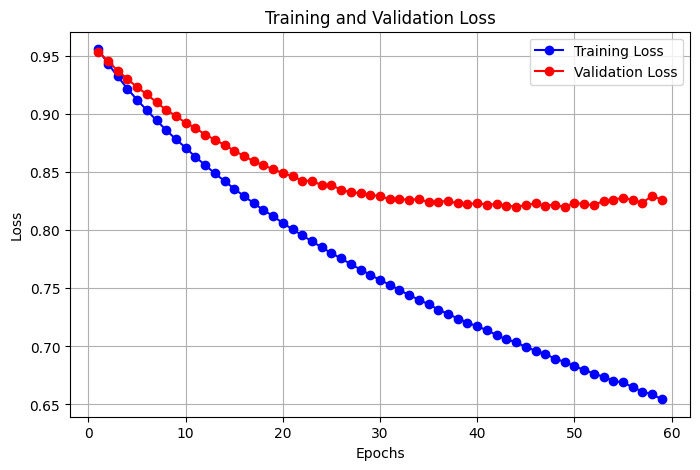

In [169]:
import matplotlib.pyplot as plt

# 모델 훈련 시 반환된 history 객체에서 loss와 val_loss 추출
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# epoch 수
epochs = range(1, len(train_loss) + 1)

# train_loss와 val_loss 시각화
plt.figure(figsize=(8, 5))
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()